## IMDB RATINGS AND ANALYSIS

I will clean the data and perform exploratory data analysis (EDA) before proceeding with model development in subsequent tasks. 
* The data contains duplications.
* Removing any column(s) that are not useful for regression or classification models.
* Identifying and counting missing values and addressing them by either removing or imputing them appropriately.
* Conducting EDA on the remaining columns. This may involve handling non-numerical values, changing data types, transforming or standardizing variables if necessary, and dummy coding certain variables.
* For classification purposes, I will be creating a column, using 'average rating' to create a new column called 'Rating' as below.
| averageRating | Rating |
| -------------| --------------------------- |
| >= 8      | *****        |
| >= 7      | ****     |
| >= 6     | ***     |
| >= 5      | **    |
| < 5      | *   |

In [1]:
import pandas as pd
movies = pd.read_csv("newimdb.csv")
print(movies.shape)
movies.head(15)

(2795295, 14)


,Unnamed: 0,tconst,types,isOriginalTitle,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
0,6475881,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,editor,8.1,63.0
1,6475882,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actor,8.1,63.0
2,6475884,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actress,8.1,63.0
3,6475886,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,director,8.1,63.0
4,6475887,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,writer,8.1,63.0
5,6475889,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,composer,8.1,63.0
6,6475890,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,cinematographer,8.1,63.0
7,6475891,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,editor,8.1,63.0
8,6475892,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actor,8.1,63.0
9,6475894,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actress,8.1,63.0


This data has a lot of duplications. My initial thoughts are that the Unnamed: 0 column is just the index that carried over a s column. The 'tconst' column is the unique movie identifier. I noticed that the data is repeated because of the first column, which I will remove, and then I will combine category and type column values for the same movie in a list.
As unique movies are 255860 the data needs to be reduced to be close to this number.

In [2]:
# Uniqe values ( movies)
len(set(movies.tconst))

255860

In [3]:
movies.columns

Index(['Unnamed: 0', 'tconst', 'types', 'isOriginalTitle', 'titleType',
       'originalTitle', 'isAdult', 'startYear', 'runtimeMinutes', 'genres',
       'directors', 'category', 'averageRating', 'numVotes'],
      dtype='object')

In [4]:
# Remove the unnamed : 0 column, as it does not seem related. 
# Also tried dropping duplicates but this will not help much as in other 
#columns, there are no 100% duplicated rows.
movies = movies.loc[:, movies.columns != 'Unnamed: 0']
movies = movies.drop_duplicates()
movies.shape

(2795295, 13)

In [5]:
movies.category.value_counts()

category
actor                  480095
director               442430
actress                416226
producer               305139
composer               280468
cinematographer        274936
writer                 246319
editor                 184444
self                   101634
production_designer     53770
archive_footage          9572
archive_sound             262
Name: count, dtype: int64

In [6]:
# Group by all columns except 'category', 'isOriginalTitle' and 'types' 
#and aggregate 'category' and 'types' values into a list
df = movies.groupby(movies.columns.difference(['isOriginalTitle','category', 'types']).tolist())[['isOriginalTitle','category', 'types']].agg(list).reset_index()

In [7]:
df.head(2)

,averageRating,directors,genres,isAdult,numVotes,originalTitle,runtimeMinutes,startYear,tconst,titleType,isOriginalTitle,category,types
0,1.0,\N,"Animation,Comedy",0.0,697.0,Biatches,4,2014,tt5016274,tvSeries,"[0.0, 0.0, 1.0, 1.0]","[actor, actress, actor, actress]","[imdbDisplay, imdbDisplay, original, original]"
1,1.0,\N,Music,0.0,8.0,Bryllup i Danmark - Fest på Christiansborg,165,2004,tt0464909,tvSpecial,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[self, writer, producer, self, writer, produce...","[original, original, original, imdbDisplay, im..."


In [8]:
# Found uniqe rows but the other column values do not look good.
df.shape

(255860, 13)

In [9]:
df.columns

Index(['averageRating', 'directors', 'genres', 'isAdult', 'numVotes',
       'originalTitle', 'runtimeMinutes', 'startYear', 'tconst', 'titleType',
       'isOriginalTitle', 'category', 'types'],
      dtype='object')

In [10]:
# Count \N
df.apply(lambda x: (x == r'\N').sum())

averageRating          0
directors           9186
genres              2517
isAdult                0
numVotes               0
originalTitle          0
runtimeMinutes     44272
startYear              0
tconst                 0
titleType              0
isOriginalTitle        0
category               0
types                  0
dtype: int64


I will remove directories as many are missing, and there is no way to use them in their form now. It is also missing a lot of values with the \N character.
The three columns that have values in lists have repeated items, and also \N symbol.
I will also remove directors and tconst columns now that the rows are unique. The original title column is just a movie name. I decided to use the length of the name as a column and the name column itself will be removed after creating the name length.

In [11]:
df['types'] = df['types'].apply(lambda x: list(set(filter(lambda y: y != r'\N', x))))
df['category'] = df['category'].apply(lambda x: list(set(filter(lambda y: y != r'\N', x))))
df['isOriginalTitle'] = df['isOriginalTitle'].apply(lambda x: list(set(filter(lambda y: y != r'\N', x))))
df.head(3)

,averageRating,directors,genres,isAdult,numVotes,originalTitle,runtimeMinutes,startYear,tconst,titleType,isOriginalTitle,category,types
0,1.0,\N,"Animation,Comedy",0.0,697.0,Biatches,4,2014,tt5016274,tvSeries,"[0.0, 1.0]","[actress, actor]","[imdbDisplay, original]"
1,1.0,\N,Music,0.0,8.0,Bryllup i Danmark - Fest på Christiansborg,165,2004,tt0464909,tvSpecial,"[0.0, 1.0]","[producer, writer, self]","[imdbDisplay, original]"
2,1.0,\N,"Music,Short",0.0,8.0,Aramburu Star,3,2018,tt8233480,short,"[0.0, 1.0]","[producer, writer]","[imdbDisplay, original]"


In [12]:
df.isna().sum()

averageRating      0
directors          0
genres             0
isAdult            0
numVotes           0
originalTitle      0
runtimeMinutes     0
startYear          0
tconst             0
titleType          0
isOriginalTitle    0
category           0
types              0
dtype: int64

In [13]:
df[['genres', 'isOriginalTitle', 'category', 'types']].head(10)

,genres,isOriginalTitle,category,types
0,"Animation,Comedy","[0.0, 1.0]","[actress, actor]","[imdbDisplay, original]"
1,Music,"[0.0, 1.0]","[producer, writer, self]","[imdbDisplay, original]"
2,"Music,Short","[0.0, 1.0]","[producer, writer]","[imdbDisplay, original]"
3,"Music,Short",[0.0],[self],[]
4,Reality-TV,[0.0],"[actress, actor]",[]
5,Reality-TV,"[0.0, 1.0]","[actress, self]","[imdbDisplay, original]"
6,Talk-Show,"[0.0, 1.0]","[actress, self]","[imdbDisplay, original]"
7,Talk-Show,"[0.0, 1.0]",[self],"[imdbDisplay, original]"
8,\N,"[0.0, 1.0]","[actor, actress]",[original]
9,\N,"[0.0, 1.0]",[self],"[imdbDisplay, original]"


In [14]:
df.apply(lambda x: (x == r'\N').sum())

averageRating          0
directors           9186
genres              2517
isAdult                0
numVotes               0
originalTitle          0
runtimeMinutes     44272
startYear              0
tconst                 0
titleType              0
isOriginalTitle        0
category               0
types                  0
dtype: int64

In [15]:
df['nameLength'] = df['originalTitle'].apply(lambda x: len(x))

In [16]:
df.columns

Index(['averageRating', 'directors', 'genres', 'isAdult', 'numVotes',
       'originalTitle', 'runtimeMinutes', 'startYear', 'tconst', 'titleType',
       'isOriginalTitle', 'category', 'types', 'nameLength'],
      dtype='object')

In [17]:
newdf = df[['averageRating', 'genres', 'isAdult', 'numVotes', 'runtimeMinutes', 'startYear', 'titleType',
       'isOriginalTitle', 'category', 'types', 'nameLength']]
newdf.head()

,averageRating,genres,isAdult,numVotes,runtimeMinutes,startYear,titleType,isOriginalTitle,category,types,nameLength
0,1.0,"Animation,Comedy",0.0,697.0,4,2014,tvSeries,"[0.0, 1.0]","[actress, actor]","[imdbDisplay, original]",8
1,1.0,Music,0.0,8.0,165,2004,tvSpecial,"[0.0, 1.0]","[producer, writer, self]","[imdbDisplay, original]",42
2,1.0,"Music,Short",0.0,8.0,3,2018,short,"[0.0, 1.0]","[producer, writer]","[imdbDisplay, original]",13
3,1.0,"Music,Short",0.0,8.0,1,2021,tvMiniSeries,[0.0],[self],[],21
4,1.0,Reality-TV,0.0,11.0,\N,2015,tvSeries,[0.0],"[actress, actor]",[],14


Data is looking better, but there is still some work to be done. The columns 'genres', 'isOriginalTitle', 'category', and 'types' columns need some work before using dummy coding on them. I also need to fix the runtime minutes, which is not a number, and it has \N character in the values. I will remove the genre column values that are \N by mode.

In [18]:
newdf.apply(lambda x: (x == r'\N').sum())

averageRating          0
genres              2517
isAdult                0
numVotes               0
runtimeMinutes     44272
startYear              0
titleType              0
isOriginalTitle        0
category               0
types                  0
nameLength             0
dtype: int64

In [19]:
newdf.dtypes

averageRating      float64
genres              object
isAdult            float64
numVotes           float64
runtimeMinutes      object
startYear            int64
titleType           object
isOriginalTitle     object
category            object
types               object
nameLength           int64
dtype: object

In [20]:
newdf.genres.value_counts().nlargest(3)

genres
Drama          25629
Documentary    22954
Comedy         16476
Name: count, dtype: int64

In [21]:
newdf['genres'] = newdf['genres'].replace('\\N', 'Drama')
newdf.apply(lambda x: (x == r'\N').sum())

/var/folders/3q/d41yk__118v3h1mrvj0b1dgm0000gn/T/ipykernel_76443/550917879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['genres'] = newdf['genres'].replace('\\N', 'Drama')


averageRating          0
genres                 0
isAdult                0
numVotes               0
runtimeMinutes     44272
startYear              0
titleType              0
isOriginalTitle        0
category               0
types                  0
nameLength             0
dtype: int64

In [22]:
import numpy as np
# Average of run time minutes axcluding the \N character.
median = np.median([int(x) for x in newdf.runtimeMinutes if x != '\\N'])
median

75.0

In [23]:
newdf['runtimeMinutes'] = newdf['runtimeMinutes'].replace('\\N', '75').astype(int)
newdf.apply(lambda x: (x == r'\N').sum())

/var/folders/3q/d41yk__118v3h1mrvj0b1dgm0000gn/T/ipykernel_76443/1924260184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['runtimeMinutes'] = newdf['runtimeMinutes'].replace('\\N', '75').astype(int)


averageRating      0
genres             0
isAdult            0
numVotes           0
runtimeMinutes     0
startYear          0
titleType          0
isOriginalTitle    0
category           0
types              0
nameLength         0
dtype: int64

In [24]:
newdf.dtypes

averageRating      float64
genres              object
isAdult            float64
numVotes           float64
runtimeMinutes       int64
startYear            int64
titleType           object
isOriginalTitle     object
category            object
types               object
nameLength           int64
dtype: object

In [25]:
newdf.head()

,averageRating,genres,isAdult,numVotes,runtimeMinutes,startYear,titleType,isOriginalTitle,category,types,nameLength
0,1.0,"Animation,Comedy",0.0,697.0,4,2014,tvSeries,"[0.0, 1.0]","[actress, actor]","[imdbDisplay, original]",8
1,1.0,Music,0.0,8.0,165,2004,tvSpecial,"[0.0, 1.0]","[producer, writer, self]","[imdbDisplay, original]",42
2,1.0,"Music,Short",0.0,8.0,3,2018,short,"[0.0, 1.0]","[producer, writer]","[imdbDisplay, original]",13
3,1.0,"Music,Short",0.0,8.0,1,2021,tvMiniSeries,[0.0],[self],[],21
4,1.0,Reality-TV,0.0,11.0,75,2015,tvSeries,[0.0],"[actress, actor]",[],14


In [26]:
import warnings
# Ignore the SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

Finally changed and fixed the numerical columns. I will now change the isOriginalTitle column values to string as 01, 0, or 1. I could also do both yes and no and dummy code.
The columns genres, categories, and types are columns that have multiple values, and I will use MultiLabelBinarizer a special kind of dummy coding. 

In [27]:
df1 = newdf

In [28]:
df1['isOriginalTitle'] = df1['isOriginalTitle'].apply(lambda z: ''.join([str(int(x)) for x in z]))
df1.head()

,averageRating,genres,isAdult,numVotes,runtimeMinutes,startYear,titleType,isOriginalTitle,category,types,nameLength
0,1.0,"Animation,Comedy",0.0,697.0,4,2014,tvSeries,01,"[actress, actor]","[imdbDisplay, original]",8
1,1.0,Music,0.0,8.0,165,2004,tvSpecial,01,"[producer, writer, self]","[imdbDisplay, original]",42
2,1.0,"Music,Short",0.0,8.0,3,2018,short,01,"[producer, writer]","[imdbDisplay, original]",13
3,1.0,"Music,Short",0.0,8.0,1,2021,tvMiniSeries,0,[self],[],21
4,1.0,Reality-TV,0.0,11.0,75,2015,tvSeries,0,"[actress, actor]",[],14


In [29]:
df1[["genres","category", "types"]].head(10)

,genres,category,types
0,"Animation,Comedy","[actress, actor]","[imdbDisplay, original]"
1,Music,"[producer, writer, self]","[imdbDisplay, original]"
2,"Music,Short","[producer, writer]","[imdbDisplay, original]"
3,"Music,Short",[self],[]
4,Reality-TV,"[actress, actor]",[]
5,Reality-TV,"[actress, self]","[imdbDisplay, original]"
6,Talk-Show,"[actress, self]","[imdbDisplay, original]"
7,Talk-Show,[self],"[imdbDisplay, original]"
8,Drama,"[actor, actress]",[original]
9,Drama,[self],"[imdbDisplay, original]"


In [30]:
abc = list(df1.genres)
# Split items with multiple genres and flatten the list
single_genre_list = [genre.split(',') if ',' in genre else [genre] for genre in abc]
single_genre_list = [item for sublist in single_genre_list for item in sublist]
print(list(set(single_genre_list)))

['Thriller', 'Musical', 'Music', 'Crime', 'History', 'Comedy', 'Short', 'Adventure', 'Documentary', 'Action', 'Talk-Show', 'Game-Show', 'Western', 'Horror', 'Reality-TV', 'Adult', 'Family', 'Fantasy', 'Romance', 'Sport', 'War', 'Drama', 'Animation', 'Mystery', 'Sci-Fi', 'Biography', 'News']


In [31]:
df1.genres.head(15)

0     Animation,Comedy
1                Music
2          Music,Short
3          Music,Short
4           Reality-TV
5           Reality-TV
6            Talk-Show
7            Talk-Show
8                Drama
9                Drama
10         Documentary
11         Documentary
12         Drama,Short
13               Drama
14        Comedy,Short
Name: genres, dtype: object

In [32]:
df1.columns

Index(['averageRating', 'genres', 'isAdult', 'numVotes', 'runtimeMinutes',
       'startYear', 'titleType', 'isOriginalTitle', 'category', 'types',
       'nameLength'],
      dtype='object')

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer
# Split values with commas and convert to list of lists
split_genres = [value.split(',') for value in df['genres']]

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the data
one_hot_encoded_genres = mlb.fit_transform(split_genres)

# Create a DataFrame with the one-hot encoded genres
genres_df = pd.DataFrame(one_hot_encoded_genres, columns=mlb.classes_)

# Concatenate the one-hot encoded genres DataFrame with the original DataFrame
df2 = pd.concat([df1, genres_df], axis=1)
df3 = df2[['averageRating','isAdult', 'numVotes', 'runtimeMinutes',
       'startYear', 'titleType', 'isOriginalTitle', 'category', 'types',
       'nameLength', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western']]
df3.head()

,averageRating,isAdult,numVotes,runtimeMinutes,startYear,titleType,isOriginalTitle,category,types,nameLength,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1.0,0.0,697.0,4,2014,tvSeries,01,"[actress, actor]","[imdbDisplay, original]",8,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,8.0,165,2004,tvSpecial,01,"[producer, writer, self]","[imdbDisplay, original]",42,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,8.0,3,2018,short,01,"[producer, writer]","[imdbDisplay, original]",13,...,0,0,0,0,1,0,0,0,0,0
3,1.0,0.0,8.0,1,2021,tvMiniSeries,0,[self],[],21,...,0,0,0,0,1,0,0,0,0,0
4,1.0,0.0,11.0,75,2015,tvSeries,0,"[actress, actor]",[],14,...,0,1,0,0,0,0,0,0,0,0


In [34]:
df3[['category', 'types']].head()

,category,types
0,"[actress, actor]","[imdbDisplay, original]"
1,"[producer, writer, self]","[imdbDisplay, original]"
2,"[producer, writer]","[imdbDisplay, original]"
3,[self],[]
4,"[actress, actor]",[]


In [35]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Split values in 'category' column and convert to list of lists
split_category = df3['category'].apply(lambda x: x if isinstance(x, list) else [x])

# Initialize MultiLabelBinarizer for 'category'
mlb_category = MultiLabelBinarizer()

# Fit and transform the 'category' data
one_hot_encoded_category = mlb_category.fit_transform(split_category)

# Create a DataFrame with the one-hot encoded 'category' values
one_hot_encoded_category_df = pd.DataFrame(one_hot_encoded_category, columns=mlb_category.classes_)

# Split values in 'types' column and convert to list of lists
split_types = df3['types'].apply(lambda x: x if isinstance(x, list) else [x])

# Initialize MultiLabelBinarizer for 'types'
mlb_types = MultiLabelBinarizer()

# Fit and transform the 'types' data
one_hot_encoded_types = mlb_types.fit_transform(split_types)

# Create a DataFrame with the one-hot encoded 'types' values
one_hot_encoded_types_df = pd.DataFrame(one_hot_encoded_types, columns=mlb_types.classes_)

# Concatenate the one-hot encoded 'category' and 'types' DataFrames with the original DataFrame
df4 = pd.concat([df3, one_hot_encoded_category_df, one_hot_encoded_types_df], axis=1)

# Drop the original 'category' and 'types' columns
df4.drop(['category', 'types'], axis=1, inplace=True)
df4.columns

Index(['averageRating', 'isAdult', 'numVotes', 'runtimeMinutes', 'startYear',
       'titleType', 'isOriginalTitle', 'nameLength', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', 'actor',
       'actress', 'archive_footage', 'archive_sound', 'cinematographer',
       'composer', 'director', 'editor', 'producer', 'production_designer',
       'self', 'writer', 'alternative', 'alternativedvd',
       'alternativefestival', 'alternativetv', 'alternativeworking', 'dvd',
       'dvdimdbDisplay', 'festival', 'festivalimdbDisplay', 'imdbDisplay',
       'imdbDisplaytv', 'imdbDisplayvideo', 'imdbDisplayworking',
       'original', 'tv', 'video', 'videoworking', 'working'],
      dtype='object')

In [36]:

# Dummy code 'titleType' and 'isOriginalTitle' columns
titletype_dummies = pd.get_dummies(df4['titleType'], prefix='titleType').astype(int)
isoriginaltitle_dummies = pd.get_dummies(df4['isOriginalTitle'], prefix='isOriginalTitle').astype(int)

# Concatenate the dummy columns with the original DataFrame
finaldf = pd.concat([df4, titletype_dummies, isoriginaltitle_dummies], axis=1)

# Drop the original 'titleType' and 'isOriginalTitle' columns
finaldf.drop(['titleType', 'isOriginalTitle'], axis=1, inplace=True)
finaldf.head()

,averageRating,isAdult,numVotes,runtimeMinutes,startYear,nameLength,Action,Adult,Adventure,Animation,...,titleType_tvMiniSeries,titleType_tvMovie,titleType_tvSeries,titleType_tvShort,titleType_tvSpecial,titleType_video,titleType_videoGame,isOriginalTitle_0,isOriginalTitle_01,isOriginalTitle_1
0,1.0,0.0,697.0,4,2014,8,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,1.0,0.0,8.0,165,2004,42,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1.0,0.0,8.0,3,2018,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,0.0,8.0,1,2021,21,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1.0,0.0,11.0,75,2015,14,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [37]:
finaldf['Rating'] = finaldf['averageRating'].apply(lambda x: '*****' if x >= 8
                                                   else '****' if x >= 7
                                                   else '***' if x >= 6
                                                   else '**' if x >= 5
                                                   else '*')
finaldf.head()

,averageRating,isAdult,numVotes,runtimeMinutes,startYear,nameLength,Action,Adult,Adventure,Animation,...,titleType_tvMovie,titleType_tvSeries,titleType_tvShort,titleType_tvSpecial,titleType_video,titleType_videoGame,isOriginalTitle_0,isOriginalTitle_01,isOriginalTitle_1,Rating
0,1.0,0.0,697.0,4,2014,8,0,0,0,1,...,0,1,0,0,0,0,0,1,0,*
1,1.0,0.0,8.0,165,2004,42,0,0,0,0,...,0,0,0,1,0,0,0,1,0,*
2,1.0,0.0,8.0,3,2018,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,*
3,1.0,0.0,8.0,1,2021,21,0,0,0,0,...,0,0,0,0,0,0,1,0,0,*
4,1.0,0.0,11.0,75,2015,14,0,0,0,0,...,0,1,0,0,0,0,1,0,0,*


In [38]:
finaldf.columns

Index(['averageRating', 'isAdult', 'numVotes', 'runtimeMinutes', 'startYear',
       'nameLength', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western', 'actor', 'actress', 'archive_footage',
       'archive_sound', 'cinematographer', 'composer', 'director', 'editor',
       'producer', 'production_designer', 'self', 'writer', 'alternative',
       'alternativedvd', 'alternativefestival', 'alternativetv',
       'alternativeworking', 'dvd', 'dvdimdbDisplay', 'festival',
       'festivalimdbDisplay', 'imdbDisplay', 'imdbDisplaytv',
       'imdbDisplayvideo', 'imdbDisplayworking', 'original', 'tv', 'video',
       'videoworking', 'working', 'titleType_movie', 'titleType_short',
       'titleType_tvEpisode', 'titleType

In [39]:
finaldf.dtypes

averageRating          float64
isAdult                float64
numVotes               float64
runtimeMinutes           int64
startYear                int64
                        ...   
titleType_videoGame      int64
isOriginalTitle_0        int64
isOriginalTitle_01       int64
isOriginalTitle_1        int64
Rating                  object
Length: 77, dtype: object

In [40]:
y = finaldf.averageRating
x = finaldf.drop(['averageRating', 'Rating'], axis=1)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the training and testing data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# Apply feature selection using SelectKBest
select_k_best = SelectKBest(score_func=f_regression, k=50)
x_train_selected = select_k_best.fit_transform(x_train_scaled, y_train)
x_test_selected = select_k_best.transform(x_test_scaled)

# Define models
models = {
    'AdaBoost': AdaBoostRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'BayesianRidge': BayesianRidge(),
    'PolynomialRegression': PolynomialFeatures(degree=2)  # This is not a model, it's a transformer
}

# Train and evaluate models using cross-validation
evaluation_metrics = {}
for model_name, model in models.items():
    if model_name == 'PolynomialRegression':
        # For PolynomialFeatures, we need to transform the data first
        poly = PolynomialFeatures(degree=2)
        x_train_poly = poly.fit_transform(x_train_selected)
        x_test_poly = poly.transform(x_test_selected)
        
        # Use a simple linear regression model for polynomial features
        model = Ridge()  # You can change this to any other regression model
    else:
        x_train_poly = x_train_selected
        x_test_poly = x_test_selected
    
    # Cross-validation on the training set
    cv_scores = cross_val_score(model, x_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    cv_rmse_mean = cv_rmse_scores.mean()
    cv_rmse_std = cv_rmse_scores.std()
    
    # Final evaluation on the testing set
    model.fit(x_train_poly, y_train)
    predictions_test = model.predict(x_test_poly)
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    r2_test = r2_score(y_test, predictions_test)
    
    evaluation_metrics[model_name] = {
        'CV RMSE Mean': cv_rmse_mean,
        'Test RMSE': rmse_test,
        'Test R-squared': r2_test
    }
# Display evaluation metrics
evaluation_df = pd.DataFrame.from_dict(evaluation_metrics, orient='index')
evaluation_df

,CV RMSE Mean,Test RMSE,Test R-squared
AdaBoost,1.432999,1.422942,0.112355
Lasso,1.520080,1.510355,-0.000054
Ridge,1.368617,1.363798,0.184611
BayesianRidge,1.368613,1.363789,0.184622
PolynomialRegression,1.354126,1.343972,0.208145



These metrics suggest that we do not have  good features and the model is not so good. While Polynomial looks better than others in comparison, I think that we need more data, movie details, information about the gross sales, etc, directory ratings, etc, to make these models better. One thing I can say is that torturing data harder does not always produce a better model.

In [42]:
y = finaldf.Rating
x = finaldf.drop(['averageRating', 'Rating'], axis=1)

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_n = label_encoder.fit_transform(y)
# Step 1: Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=50)
X_selected = selector.fit_transform(x, y_n)

# Step 2: Train-Test-Validation Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_n, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # Splitting again for validation

# Step 3: Model Training and Evaluation
models = {
    "GradientBoosting": GradientBoostingClassifier(),
    "NaiveBayes": GaussianNB(),
    "GMM": GaussianMixture(n_components=5),  # Assuming 5 classes
    "MLP": MLPClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

results = {"Model": [], "Train Accuracy": [], "Train F1": [], "Test Accuracy": [], "Test F1": []}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    val_pred = model.predict(X_val)  # Using validation set for evaluation

    train_acc = accuracy_score(y_train, train_pred)
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    test_acc = accuracy_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred, average='weighted')

    results["Model"].append(name)
    results["Train Accuracy"].append(train_acc)
    results["Train F1"].append(train_f1)
    results["Test Accuracy"].append(test_acc)
    results["Test F1"].append(test_f1)
pd.DataFrame(results)

/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Train Accuracy,Train F1,Test Accuracy,Test F1
0,GradientBoosting,0.393281,0.380401,0.387263,0.374740
1,NaiveBayes,0.147737,0.069144,0.143594,0.065521
2,GMM,0.157658,0.148333,0.155632,0.146257
3,MLP,0.354654,0.346558,0.349820,0.341763
4,AdaBoost,0.363617,0.338319,0.361448,0.335806


Confusion matrix for GradientBoosting:


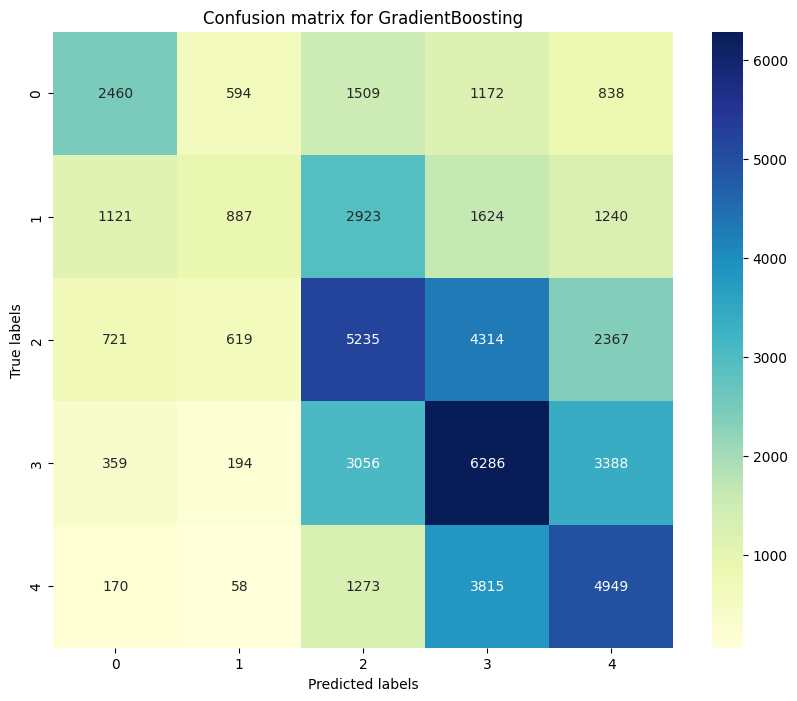

/opt/anaconda3/envs/hw1/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Step 3: Model Training and Evaluation
models = {
    "GradientBoosting": GradientBoostingClassifier(),
    "NaiveBayes": GaussianNB(),
    "GMM": GaussianMixture(n_components=5),  # Assuming 5 classes
    "MLP": MLPClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

results = {"Model": [], "Train Accuracy": [], "Train F1": [], "Test Accuracy": [], "Test F1": []}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    val_pred = model.predict(X_val)  # Using validation set for evaluation

    train_acc = accuracy_score(y_train, train_pred)
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    test_acc = accuracy_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred, average='weighted')

    # Printing confusion matrix for GradientBoostingClassifier
    if name == "GradientBoosting":
        print(f"Confusion matrix for {name}:")
        cm = confusion_matrix(y_test, test_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.title(f"Confusion matrix for {name}")
        plt.show()



Gradient boosting looks to be better than the other models, but the scores are still shallow for this model to be usable. The fact remains true that the data set needs more features. We could do more parameter tuning, but it is expected to go lower than we would like it to be.

In [45]:
clusterdf = finaldf.drop(columns=['Rating'])
clusterdf.head(2)

,averageRating,isAdult,numVotes,runtimeMinutes,startYear,nameLength,Action,Adult,Adventure,Animation,...,titleType_tvMiniSeries,titleType_tvMovie,titleType_tvSeries,titleType_tvShort,titleType_tvSpecial,titleType_video,titleType_videoGame,isOriginalTitle_0,isOriginalTitle_01,isOriginalTitle_1
0,1.0,0.0,697.0,4,2014,8,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,1.0,0.0,8.0,165,2004,42,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


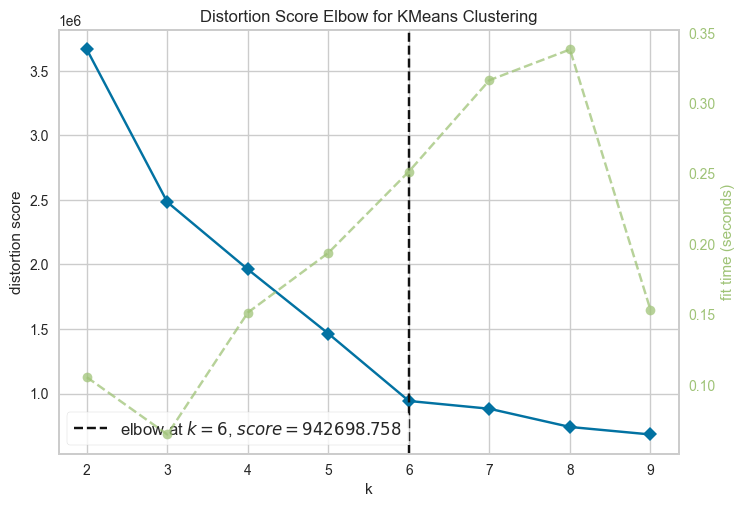

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clusterdf)

# Perform PCA
pca = PCA(n_components=5)  # Reduce to 5 dimensions
X_pca = pca.fit_transform(X_scaled)

# Instantiate KMeans model
kmeans_model = KMeans()

# Instantiate the KElbowVisualizer with the KMeans model
kmeans_visualizer = KElbowVisualizer(kmeans_model, k=(2, 10))

# Fit the data to the visualizer
kmeans_visualizer.fit(X_pca)  # Use the PCA-transformed data

# Visualize the elbow plot to find the optimal number of clusters
kmeans_visualizer.show()


In [47]:

from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, Birch

# Instantiate Gaussian Mixture Model with k=6
gmm_model = GaussianMixture(n_components=7)

# Fit and predict labels
gmm_labels = gmm_model.fit_predict(X_pca)

# Instantiate DBSCAN model with k=6
dbscan_model = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict labels
dbscan_labels = dbscan_model.fit_predict(X_pca)

# Instantiate Birch model with k=7
birch_model = Birch(n_clusters=7)

# Fit and predict labels
birch_labels = birch_model.fit_predict(X_pca)

# Create a new DataFrame to store cluster labels

# Add cluster labels to the new DataFrame
newdf['GMM_Cluster'] = gmm_labels
newdf['DBSCAN_Cluster'] = dbscan_labels
newdf['Birch_Cluster'] = birch_labels
newdf.head()

,averageRating,genres,isAdult,numVotes,runtimeMinutes,startYear,titleType,isOriginalTitle,category,types,nameLength,GMM_Cluster,DBSCAN_Cluster,Birch_Cluster
0,1.0,"Animation,Comedy",0.0,697.0,4,2014,tvSeries,01,"[actress, actor]","[imdbDisplay, original]",8,2,0,0
1,1.0,Music,0.0,8.0,165,2004,tvSpecial,01,"[producer, writer, self]","[imdbDisplay, original]",42,3,0,3
2,1.0,"Music,Short",0.0,8.0,3,2018,short,01,"[producer, writer]","[imdbDisplay, original]",13,3,0,0
3,1.0,"Music,Short",0.0,8.0,1,2021,tvMiniSeries,0,[self],[],21,0,1,4
4,1.0,Reality-TV,0.0,11.0,75,2015,tvSeries,0,"[actress, actor]",[],14,5,1,4


In [48]:
print(newdf.GMM_Cluster.value_counts())
print(newdf.DBSCAN_Cluster.value_counts())
print(newdf.Birch_Cluster.value_counts())

GMM_Cluster
1    86381
4    49544
6    47175
2    24767
3    23201
5    18388
0     6404
Name: count, dtype: int64
DBSCAN_Cluster
 0     214949
 1      22701
 2       8146
 4       3744
-1       2613
 5       1334
 3       1061
 6        661
 8        221
 7         63
 10        42
 12        21
 23        19
 20        18
 11        13
 16        11
 28         9
 19         9
 24         8
 39         8
 22         8
 40         8
 41         8
 29         8
 18         7
 13         7
 14         7
 42         7
 15         7
 17         6
 35         6
 31         6
 48         6
 44         6
 50         6
 38         6
 25         6
 32         5
 54         5
 37         5
 46         5
 33         5
 52         5
 53         5
 47         5
 26         5
 51         5
 49         5
 21         5
 36         5
 30         5
 9          5
 55         5
 45         4
 43         4
 27         4
 34         2
Name: count, dtype: int64
Birch_Cluster
0    124016
2     79990
3     25

In [49]:
newdf[newdf.Birch_Cluster == 5]

,averageRating,genres,isAdult,numVotes,runtimeMinutes,startYear,titleType,isOriginalTitle,category,types,nameLength,GMM_Cluster,DBSCAN_Cluster,Birch_Cluster
24088,4.5,Documentary,0.0,109.0,43200,2020,movie,01,"[director, editor, actress, actor]","[imdbDisplay, original]",8,3,-1,5
103260,6.4,Documentary,0.0,181.0,51420,2012,movie,01,"[director, producer]","[working, imdbDisplay, original]",9,3,-1,5
195383,7.8,Drama,0.0,24.0,35791,2011,video,01,[director],"[imdbDisplay, original]",41,3,-1,5


In [50]:
print(newdf.groupby(['GMM_Cluster'])['titleType'].count().reset_index())
print(newdf.groupby(['Birch_Cluster'])['titleType'].count().reset_index())

   GMM_Cluster  titleType
0            0       6404
1            1      86381
2            2      24767
3            3      23201
4            4      49544
5            5      18388
6            6      47175
   Birch_Cluster  titleType
0              0     124016
1              1       2042
2              2      79990
3              3      25207
4              4       5253
5              5          3
6              6      19349


* According to the Birch CLustering model, the above three rows are in a single cluster. DBSCAN puts all these three into outliers. It makes sense as we see the runtime minutes of these three, which are in thousands of minutes.
* The DBSCAN model, which finds its own cluster number, puts almost all the rows (214944 rows) into a single cluster, but then the rest are divided into 36 more clusters, with each containing very few. There are 2602 rows that are anomalies or outliers according to this model and require a deeper look into why.
* Birch and GMM have very similar and almost identical averages and median average ratings for all of the 7 clusters, but the count of rows in each of the models is wildly different, with Birch putting almost half the rows in cluster 0.